In [146]:
include("intro.jl")

using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using HNProcess
using DataRefine
using PartitioningData
using Random

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



In [29]:
# Testing function for making hadamard matrices using Sylvester's construction
function hadamard_gen_TEST(n::Int)
    if !(n % 4 == 0 || n == 1 || n == 2)
        throw("argument must be divisible by 4 (or equal to 1 or 2)")
    end
    k = log(2,n)
    global H = [1]
    for i in 1:k
        r1 = hcat(H,H)
        r2 = hcat(H,-1 .* H)
        H_n = vcat(r1,r2)
        H = H_n
    end
    
    return H
end

hadamard_gen_TEST (generic function with 1 method)

In [31]:
println(Integer(log(16)/log(2)))

t = @elapsed had = hadamard_gen_TEST(1024)

println(t)
#=
pretty_table(had)
s_1 = 4
s_2 = 4
ims = []
for r in eachrow(had)
    i = reshape(r,s_1,s_2)
    push!(ims, i)
    #pretty_table(i)
end
println(length(ims)) =#

4
0.161699208


In [4]:
# uses hadamard_gen to make lists of images
function orthogonal_image_generator(n::Int)::Vector{Matrix{Int64}}
    had = hadamard_gen(n)
    s =  Integer(sqrt(size(had,1)))
    ims = []
    for r in eachrow(had)
        i = reshape(r,s,s)
        push!(ims, i)
    end
    return ims
end

function orthogonal_image_generator(hada::Matrix)::Vector{Matrix{Int64}}
    had = hada
    s =  Integer(sqrt(size(had,1)))
    ims = []
    for r in eachrow(had)
        i = reshape(r,s,s)
        push!(ims, i)
    end
    return ims
end



orthogonal_image_generator (generic function with 2 methods)

In [5]:
# Display all images made to manually check if everything is good
k = orthogonal_image_generator(64)
for i in k
    println(findfirst(s -> s == i, k))
    pretty_table(i)
end

1
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
2
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 

In [6]:
images = Dict(
    "i1"  => [
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
    ],
    
    "i2" => [
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
    ],
    
    "i3"  => [
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
    ],
    
    "i4" => [
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
    ],

    "i5" => [
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
    ],

    "i6" => [
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
    ] 
    
)

Dict{String, Matrix{Int64}} with 6 entries:
  "i5" => [1 1 … -1 -1; 1 1 … -1 -1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i4" => [1 1 … -1 -1; 1 1 … -1 -1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i3" => [-1 -1 … 1 1; -1 -1 … 1 1; … ; 1 1 … -1 -1; 1 1 … -1 -1]
  "i1" => [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1]
  "i2" => [-1 -1 … 1 1; -1 -1 … 1 1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i6" => [1 1 … -1 -1; -1 -1 … 1 1; … ; -1 -1 … 1 1; 1 1 … -1 -1]

In [202]:
sim_time = 4
steps = 1500
im_all = orthogonal_image_generator(64)
println(length(im_all))
selected::Vector{Matrix{Int64}} = []
s = [1,2,3,4,5,6]
for t in s
    push!(selected, im_all[t])
end
parameters = Dict{String, Any}(
    "images" => selected,
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1),(3,2,1)]
)
println(length(parameters["images"]))
@show length(parameters["images"])

64
6
length(parameters["images"]) = 6


6

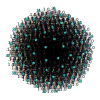

In [227]:
# Graph Checker
graph = get_HN_graph(parameters["images"],1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
 gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

In [228]:
println(is_connected(graph))
println(maximum(weights(graph)))
println(minimum(weights(graph)))
@show sum(abs.(weights(graph)))

true
1.0
-1.0
sum(abs.(weights(graph))) = 4032.0


4032.0

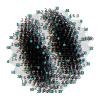

In [80]:
# Graph Checker
graph = get_HN_graph(parameters["images"],1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
 gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

In [198]:
println(is_connected(graph))
println(maximum(weights(graph)))
println(minimum(weights(graph)))

true
5.0
-1.0


In [218]:
#Running
res = HN_Solver_Traj(parameters, true)
save_trajectories(res[2], "16by16","len63_t5")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │     -1 │      1 │      1 │      1 │     -1 │      1 │     -1 │
│     -1 │      1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │      1 │
│      1 │      1 │     -1 │      1 │     -1 │     -1 │      1 │     -1 │
│     -1 │     -1 │      1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │
│      1 │      1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
File 16by16_1_len63_t5.dat is generated


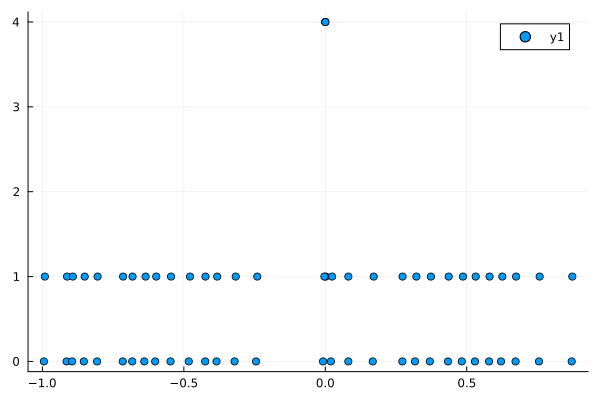

In [219]:
# Graphing
    rot = iterative_rotater_state(res[1],parameters)
    g = get_HN_graph(parameters["images"],parameters["scaling"])
    binary = [i[1] for i in rot]
    x = res[1][2]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = scatter(x,y)

In [220]:
sol_finder(res[1], parameters)

Any[]

In [59]:
# Manually searching for lowest cut states, to see what V2 made
# Use the code below this cell to find the necessary floats to rotate by

rots = iterative_rotater_list(res[1], [-0.744638890046583, -0.5394466972645939, 0.6697830704796062], 8, true)
for i in 1:length(rots)
    println(Dice.cut(graph, rots[i][1]))
end
for i in parameters["images"]
    pretty_table(i)
end

rotated by -0.744638890046583
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
rotated by -0.5394466972645939
┌────────┬────────┬────────┬────────┬────────┬─────

LoadError: UndefVarError: `graph` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [57]:
# Gives the points on the graph
function HN_cut_plotter_TEST(params, state, debug = false)
    rot = iterative_rotater_state(state,params)
    g = get_HN_graph(params["images"],params["scaling"])
    binary = [i[1] for i in rot]
    x = state[2]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = Plots.scatter(x,y)
    if debug
        x_p = p[1][1][:x]
        y_p = p[1][1][:y]
        for i in 1:length(x_p)
            println("($(x_p[i]),$(y_p[i]))")
        end
    end
    return p
end

HN_cut_plotter_TEST (generic function with 2 methods)

(0.0,120.0)
(-0.5394466972645939,0.0)
(-0.2623670033211506,152.0)
(-0.36404313907017094,216.0)
(-0.6367863155665701,120.0)
(-0.19487477437933864,240.0)
(-0.2515440500856394,152.0)
(0.8257167867422739,56.0)
(-0.10987439467378002,56.0)
(-0.4365012647195925,224.0)
(-0.1041180671623253,112.0)
(-0.3402751516192619,248.0)
(-0.6126343066955526,56.0)
(-0.2153666504819289,176.0)
(-0.3625228509006569,240.0)
(0.7273923863257625,96.0)
(0.026154884480992804,120.0)
(-0.42109593897558617,192.0)
(-0.22038468669006994,152.0)
(-0.288412478688003,248.0)
(-0.744638890046583,0.0)
(-0.24127804707462794,96.0)
(-0.4569837827654827,128.0)
(0.7869629433949157,120.0)
(0.036127916432224016,56.0)
(-0.5141386878402812,56.0)
(-0.11956737526309891,120.0)
(-0.38454945989335093,120.0)
(-0.6192867728403428,96.0)
(-0.18972913860294027,248.0)
(-0.44341776023552704,184.0)
(0.7653469656512109,120.0)
(-0.07209601368035105,56.0)
(-0.45970818191641355,120.0)
(-0.14827527821730857,224.0)
(-0.37217844016939494,176.0)
(-0.7103647

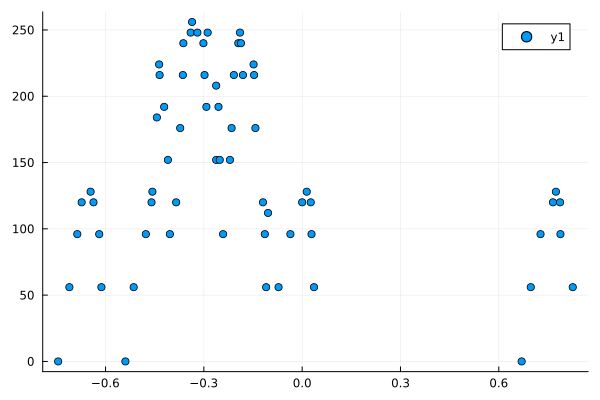

In [58]:
#Running, gives cont and cut. Take lowest cut cont values to see what solutions should be

HN_cut_plotter_TEST(parameters, res[1], true)

In [283]:
# Encodes objective function to maximize
function objective_func_G(state, images)
    s = 0
    for i in images
        for m in 1:length(state)
            for n in 1:length(state)
                s += state[m] * i[m] * state[n] * i[n]
            end
        end
    end
    return (s * 0.25)
end

objective_func_G (generic function with 1 method)

In [284]:
for i in parameters["images"]
    state = copy(vec(i))
    println(objective_func_G(state,parameters["images"]))
end

64.0
64.0
64.0
64.0
64.0


In [285]:
graph = get_HN_graph(parameters["images"],1.0)
r = iterative_rotater_state(res[1], parameters)
s = []
c_now = 999
for i in r
    c_i = cut(graph, i)
    if c_i < c_now
        c_now = c_i
    end
    println(c_now)
end

for i in r
    c = cut(graph, i)
    if c == c_now
        push!(s,i)
    end
end

println(s)
for i in s 
    pretty_table(reshape(i[1],4,4))
end

24.0
12.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
Any[(Int8[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1], [-0.4161820612869027, 0.8267422497135342, -1.0, 0.8409116734349724, -0.24727302197639833, -0.24727302197639833, 0.84364151521181, -0.4161514380442477, -0.42736529764994824, 0.8413224536262798, -0.9883576068925466, 0.8301282924541225, 0.8226612237200186, -0.41247334917856393, -0.4283561260177329, -0.42674577527231095]), (Int8[-1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1], [0.8310909606894956, 0.0740152716899325, 0.24727302197639833, 0.08818469541137075, -1.0, -1.0, 0.0909145371882083, 0.8311215839321506, 0.8199077243264503, 0.08859547560267811, 0.25891541508385196, 0.07740131443052078, 0.06993424569641693, 0.8347996727978346, 0.8189168959586652, 0.8205272467040876]), (Int8[-1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1], [0.8310909606894956, 0.0740152716899325, 0.24727302197639833, 0.08818469541137075, -1.0, -1.0, 0.09091

In [147]:
using PartitioningData
using Random
function generate_unique(N::Int, sample::Vector{Int})
    if length(sample) >= N
        error("Not enough space")
    end
    while true
        s = rand(1:N)
        if !(s in sample)
            return s
        end
    end
end

generate_unique (generic function with 1 method)

In [229]:
sim_time = 8
steps = 3000
im_all = orthogonal_image_generator(64)
println(length(im_all))
selected::Vector{Matrix{Int64}} = []
sl::Vector{Int64}=shuffle(1:64)[1:6]
for t in sl
    push!(selected, im_all[t])
end
g = get_HN_graph(selected,1.0)
parameters = Dict{String, Any}(
    "images" => selected,
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,2,-1)]#,(1,2,-1),(3,4,1)]
)
println(parameters["delta"])
@show sl

64
-0.0026666666666666666
sl = [55, 52, 24, 51, 36, 3]


6-element Vector{Int64}:
 55
 52
 24
 51
 36
  3

In [226]:
#=for i in parameters["images"]
    pretty_table(i)
end=#

In [230]:
conv = 0
elp = @elapsed begin
    for i in 1:100
        r = HN_og(parameters)
        if (reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            conv +=1 
        end
    end
end
println(conv)
println("took $elp seconds")

23
took 2.094194125 seconds


In [231]:
conv = 0
twos = 0 
others = 0
elp = @elapsed begin
    for i in 1:100
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv += 1
        end
        if sol_count == 2
            twos += 1 
        end
        if sol_count > 2
            others += 1 
        end
    end
end
println("Number of convs: $(conv)")
println("Number of twos: $(twos)")
println("Number of more than two sols: $(others)")
println("took $elp seconds")

Number of convs: 94
Number of twos: 53
Number of more than two sols: 0
took 6.904244416 seconds


In [175]:
#WARNING will generate a bunch of .dat files
r = HN_Solver(parameters)

pretty_table(reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))

conv = 0
elp = @elapsed begin
    for i in 1:10
        r = HN_Solver_Traj(parameters)
        rs = iterative_rotater_state(r[1], parameters)
        f = false
        for st in rs
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                conv +=1 
                f = true
                break
            end
        end
        if !f
            println("FAILED AT $i")
            save_trajectories(r[2], "8by8_len_6","iter_$i")
            pretty_table(reshape(r[1][1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
        end
    end
end
println(conv)
println("took $elp seconds")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FAILED AT 1
File 8by8_len_6_1_iter_1.dat is generated
┌────────┬────────┬────────┬────────┬────────┬────────┬───

In [448]:
#Running
res = HN_Solver_Traj(parameters, true)
save_trajectories(res[2], "8by8","len8_t02")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
File 8by8_1_len8_t02.dat is generated


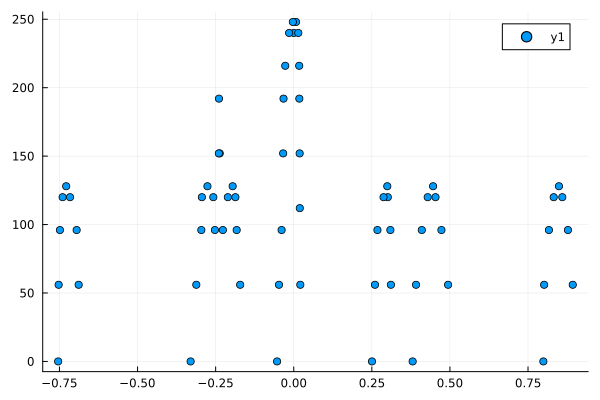

In [431]:
HN_cut_plotter(parameters, res[1])

In [434]:
sol_finder(res[1], parameters)

Any[]

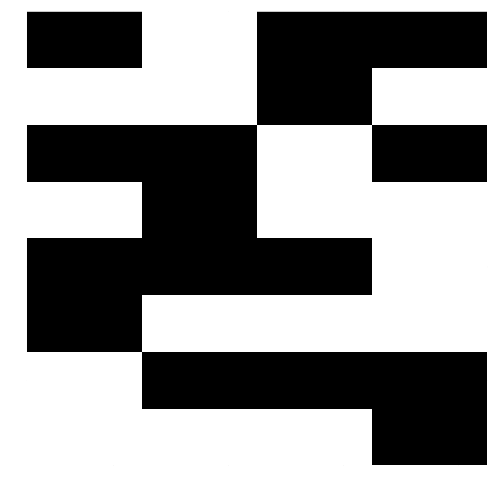

In [465]:
p = heatmap(reshape(res[1][1],8,8);
            # framestyle = :box, # doesn't work
            # framestyle = :none, # no boundary
            legend = false,
            color = cgrad([:black, :white]),
            axis = false,
            size = (500, 500))

# Save the plot to a PNG file
savefig(p, "binary_matrix_large.png")

# Display the plot if running in a script
display(p)